# Simple Sequential Model

* Training
* Model methods and attributes
* Save and Load Model
* Prediction

# Training

## Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

## Storing the data in Pandas Dataframe

In [4]:
df = pd.DataFrame(data = {"Age": train_samples, "Side Effect?": train_labels})

In [5]:
df.head(10) # Top 10 datapoints, 1 means Yes, 0 means No

,Age,Side Effect?
0,18,1
1,98,0
2,42,1
3,83,0
4,15,1
5,95,0
6,28,1
7,74,0
8,41,1
9,80,0


In [6]:
df.describe()

,Age,Side Effect?
count,2100.000000,2100.000000
mean,60.102381,0.500000
std,25.833684,0.500119
min,13.000000,0.000000
25%,37.000000,0.000000
50%,64.500000,0.500000
75%,82.000000,1.000000
max,100.000000,1.000000


## Scalling Input in range 0 to 1 (Normalize)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

If we try to fit and transform the current Age column, it will give us a `DataConversionWarning` warning. This is because the type of `df['Age']` is `int`.

In [8]:
type(df['Age'][0])

numpy.int64

Let's comvert it to float:

In [9]:
df['Age'] = df['Age'].astype('float')

In [10]:
type(df['Age'][0])

numpy.float64

In [11]:
df['Age'] = scaler.fit_transform((df['Age']).values.reshape(-1,1))

In [12]:
df.head(10)

,Age,Side Effect?
0,0.057471,1
1,0.977011,0
2,0.333333,1
3,0.804598,0
4,0.022989,1
5,0.942529,0
6,0.172414,1
7,0.701149,0
8,0.321839,1
9,0.770115,0


## Simple Sequential Model


In [13]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


The Sequential model is a linear stack of layers.

We can pass in an array each of which element will represents one layer.

In [14]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Instead of passing the layer in constructor we can also use add() method.

```
model = Sequential()
model.add(Dense(16, input_shape(1, ), activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
```

***

Here **Dense()** represents the first hidden layer in NN.

Example from [here](http://keras.dhpit.com/):
```
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
```

It means 8 input parameters, with 12 neurons in the FIRST hidden layer.

![](http://keras.dhpit.com/img/nn.png)

So for our case we have 1 input parameter and in 1's hidden layer we have 16 neurons, for 2nd hidden layer we have 32 neurons and for output layer we have 2 neurons.

***

NOTE: *The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.*

***

Other then this we have pass the activation function which needed to be applied to convert each input signal into output signals (Activation functions are applied to the weighted sum and based on the value we get after applying activation fucntion we deside whrther to pass on the signal to next neuron or not).

There are quite a few activation function we should look for:

**Treshold**:

![](threshold.png)

**Sigmoid**:

![](sigmoid.png)

**Rectifier**:

![](rectifier.png)

**Hyperbolic Tangent**:

![](hyperbolicTangent.png)

There are many more.

***

This is a simple structure of neural network

![](structure.png)

We can see the summary of the neural network. 

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Here we are using Adam optimization function. Optimization function are the way by which we update the weight and bias in our neural network (It does it by minimizing (or maximizing) the **Objective function** or sometime called **Error Function**. There are different optimazation fuction which may affect the way you produce the output (it may be slightly better or faster).

[There are many optimization function to use from](https://keras.io/optimizers/):

* Gradient Descent
* Adagrad
* AdaDelta
* Adam

and many more.

***

Loss function is used to measure the inconsistency between predicted value (y') and actual label (y).

[There are many loss fucntion to use from](https://keras.io/losses/):

* Mean Squared Error
* Mean Absolute Error
* Mean Squared Logarithmic Error
* Categorical Cross Entropy

and many more

***

A **[metric](https://keras.io/metrics/)** is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model.

***

All we are doing here is compiling the model. This is only neccesary when we are *training* the model, but not when we are *predicting* something using a pretrained model.

This is because when training the model we need to do both *forward pass* and *back pass*. So we need to specify which optimization function we need to use to update the weight and biases or what loss function we need to use. But when predicting we just need one forward pass. Hence no compiling is required while predicting.

## Training the model

In [17]:
model.fit(x = df['Age'], y = df['Side Effect?'], batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6581 - acc: 0.5562
Epoch 2/20
 - 0s - loss: 0.6237 - acc: 0.7110
Epoch 3/20
 - 0s - loss: 0.5881 - acc: 0.7652
Epoch 4/20
 - 0s - loss: 0.5547 - acc: 0.7995
Epoch 5/20
 - 0s - loss: 0.5206 - acc: 0.8295
Epoch 6/20
 - 0s - loss: 0.4867 - acc: 0.8548
Epoch 7/20
 - 0s - loss: 0.4543 - acc: 0.8662
Epoch 8/20
 - 0s - loss: 0.4248 - acc: 0.8810
Epoch 9/20
 - 0s - loss: 0.3987 - acc: 0.8871
Epoch 10/20
 - 0s - loss: 0.3763 - acc: 0.9024
Epoch 11/20
 - 0s - loss: 0.3575 - acc: 0.9067
Epoch 12/20
 - 0s - loss: 0.3418 - acc: 0.9119
Epoch 13/20
 - 0s - loss: 0.3288 - acc: 0.9143
Epoch 14/20
 - 0s - loss: 0.3185 - acc: 0.9200
Epoch 15/20
 - 0s - loss: 0.3097 - acc: 0.9214
Epoch 16/20
 - 0s - loss: 0.3025 - acc: 0.9233
Epoch 17/20
 - 0s - loss: 0.2967 - acc: 0.9248
Epoch 18/20
 - 0s - loss: 0.2920 - acc: 0.9276
Epoch 19/20
 - 0s - loss: 0.2879 - acc: 0.9295
Epoch 20/20
 - 0s - loss: 0.2844 - acc: 0.9300


Here we pass the independent and dependent parameter (x and y) folowed by batch size.

Batch size is **number of samples** passed through a network at one time. 

Why not pass one by one?

It's better to pass more than one sample at a time if our machine can easily haddle them. It make the process of training the model fast. But there is a trade off.

Larger batch sizes => faster progress in training but don't always converge as fast. 

Smaller batch sizes => train slower, but can converge faster.

So it depends on the type of problem and is one of the very important hyperparameter.

***

Epoch is one pass over the entire dataset.

***

Think, we have **dataset of 1000 samples** and we are training out model using **batch size of 10 samples**. Now 1 epoch will be completed when we have passed 100 batch.

i.e. `1000 samples / 10 samples per batch = 100 batch per epoch`

***

`Shuffle = True` tell that we should shuffle the data and in each epoch the data (samples) are going to be in different order.

***

verbose is just specifying how we should see the output.

0 = silent, 1 = progress bar, 2 = one line per epoch.

## Training the model with validation set

In [18]:
# Recreating the archietecture and configuration
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer = Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with validation
model.fit(x = df['Age'], y = df['Side Effect?'], validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.7188 - acc: 0.4571 - val_loss: 0.7057 - val_acc: 0.3857
Epoch 2/20
 - 0s - loss: 0.6913 - acc: 0.4582 - val_loss: 0.6767 - val_acc: 0.6000
Epoch 3/20
 - 0s - loss: 0.6667 - acc: 0.5995 - val_loss: 0.6493 - val_acc: 0.6429
Epoch 4/20
 - 0s - loss: 0.6423 - acc: 0.6646 - val_loss: 0.6217 - val_acc: 0.6810
Epoch 5/20
 - 0s - loss: 0.6169 - acc: 0.7048 - val_loss: 0.5921 - val_acc: 0.7286
Epoch 6/20
 - 0s - loss: 0.5902 - acc: 0.7354 - val_loss: 0.5608 - val_acc: 0.7714
Epoch 7/20
 - 0s - loss: 0.5621 - acc: 0.7656 - val_loss: 0.5294 - val_acc: 0.8000
Epoch 8/20
 - 0s - loss: 0.5362 - acc: 0.7942 - val_loss: 0.4993 - val_acc: 0.8095
Epoch 9/20
 - 0s - loss: 0.5104 - acc: 0.8175 - val_loss: 0.4691 - val_acc: 0.8381
Epoch 10/20
 - 0s - loss: 0.4854 - acc: 0.8344 - val_loss: 0.4397 - val_acc: 0.8571
Epoch 11/20
 - 0s - loss: 0.4612 - acc: 0.8503 - val_loss: 0.4116 - val_acc: 0.8810
Epoch 12/20
 - 0s - loss: 0.4387 - acc

**Validation Set** is basically used to minimize overfitting. It is used during training phase but the thing is that you are nottraining over this data. You are just verifying that the increase in accuracy in taining data actually yeilds an increase in accuracy for a data which was never show to the network before.

Above you can see we have two extra parameters in the output `val_loss` (Loss over validation data) and `val_acc` (Accuracy over validation data).

NOTE: *If the accuracy on the training set is increasing but the accuracy in the validation set is same or decreasing then we should probably stop training as because we are just overfiting over the training data.*

# Model methods and attributes


* **model.layers** is a flattened list of the layers comprising the model.


* **model.inputs** is the list of input tensors of the model.


* **model.outputs** is the list of output tensors of the model.


* **model.summary()** prints a summary representation of your model.


* **model.get_config()** returns a dictionary containing the configuration of the model. The model can be reinstantiated from its config.


* **model.get_weights()** returns a list of all weight tensors in the model, as Numpy arrays.


* **model.set_weights(weights)** sets the values of the weights of the model, from a list of Numpy arrays. The arrays in the list should have the same shape as those returned by get_weights().


* **model.to_json()** returns a representation of the model as a JSON string. Note that the representation does not include the weights, only the architecture. You can reinstantiate the same model (with reinitialized weights) from the JSON string.

    
* **model.to_yaml()** returns a representation of the model as a YAML string. Note that the representation does not include the weights, only the architecture. You can reinstantiate the same model (with reinitialized weights) from the YAML string.


* **model.save_weights(filepath)** saves the weights of the model as a HDF5 file.


* **model.load_weights(filepath, by_name=False)** loads the weights of the model from a HDF5 file (created by  save_weights). By default, the architecture is expected to be unchanged. To load weights into a different architecture (with some layers in common), use by_name=True to load only those layers with the same name.


# Save and Load Model

## Saving/loading whole models (architecture + weights + optimizer state)

You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:

* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


### Saving

In [19]:
model.save('medical_trial_model.h5')

In [20]:
# Delete existing model
del model

### Loading

In [21]:
from keras.models import load_model
model = load_model('medical_trial_model.h5')

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Weight of each layer

There are two ways to see the weights:

** Print weight for each layer **

In [23]:
model.layers

In [24]:
for i, layer in enumerate(model.layers):
    print('======================================================================================================')
    print(f'\nLayer {i + 1} weight: \n\n', layer.get_weights()) # list of numpy arrays


Layer 1 weight: 

 [array([[-0.11916009, -0.30759248, -0.04751443, -0.48624253, -0.42579335,
         0.31345192,  0.34904912,  0.23672101,  0.75624794, -0.12187678,
         0.4269982 ,  0.29224756,  0.1892598 ,  0.68758857,  0.72258794,
        -0.26506439]], dtype=float32), array([ 0.        ,  0.        ,  0.24352528,  0.        ,  0.        ,
        0.11395515,  0.18912597, -0.06024418, -0.1510088 ,  0.        ,
       -0.1254327 , -0.06175768, -0.06024124, -0.13476065, -0.14081366,  0.        ], dtype=float32)]

Layer 2 weight: 

 [array([[ 0.3069357 , -0.31109902,  0.05524549, -0.05416191, -0.1555647 ,
         0.289103  ,  0.24298915, -0.29186827,  0.13510418,  0.1015529 ,
        -0.02454144,  0.19875541,  0.14534298, -0.01244098, -0.10384941,
         0.26365915, -0.06930619,  0.01960906,  0.24268928,  0.03361362,
        -0.20039587, -0.22970293, -0.15259595,  0.31663182, -0.14352974,
         0.27723423, -0.02870452, -0.24521963, -0.22228931,  0.23598525,
        -0.15924

** Use `model.get_weight()` **

In [25]:
model.get_weights()

[array([[-0.11916009, -0.30759248, -0.04751443, -0.48624253, -0.42579335,
          0.31345192,  0.34904912,  0.23672101,  0.75624794, -0.12187678,
          0.4269982 ,  0.29224756,  0.1892598 ,  0.68758857,  0.72258794,
         -0.26506439]], dtype=float32),
 array([ 0.        ,  0.        ,  0.24352528,  0.        ,  0.        ,
         0.11395515,  0.18912597, -0.06024418, -0.1510088 ,  0.        ,
        -0.1254327 , -0.06175768, -0.06024124, -0.13476065, -0.14081366,  0.        ], dtype=float32),
 array([[ 0.3069357 , -0.31109902,  0.05524549, -0.05416191, -0.1555647 ,
          0.289103  ,  0.24298915, -0.29186827,  0.13510418,  0.1015529 ,
         -0.02454144,  0.19875541,  0.14534298, -0.01244098, -0.10384941,
          0.26365915, -0.06930619,  0.01960906,  0.24268928,  0.03361362,
         -0.20039587, -0.22970293, -0.15259595,  0.31663182, -0.14352974,
          0.27723423, -0.02870452, -0.24521963, -0.22228931,  0.23598525,
         -0.15924749, -0.16258164],
        [

In [26]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_4',
   'trainable': True,
   'units': 16,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_reg

In [27]:
model.optimizer

## Saving/loading only a model's architecture

If you only need to save the architecture of a model, and not its weights or its training configuration, we can use the `to_json()` or `to_yaml()` method

In [28]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

The generated JSON / YAML files are human-readable and can be manually edited if needed.

In [29]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [30]:
yaml_string

'backend: tensorflow\nclass_name: Sequential\nconfig:\n- class_name: Dense\n  config:\n    activation: relu\n    activity_regularizer: null\n    batch_input_shape: !!python/tuple [null, 1]\n    bias_constraint: null\n    bias_initializer:\n      class_name: Zeros\n      config: {}\n    bias_regularizer: null\n    dtype: float32\n    kernel_constraint: null\n    kernel_initializer:\n      class_name: VarianceScaling\n      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}\n    kernel_regularizer: null\n    name: dense_4\n    trainable: true\n    units: 16\n    use_bias: true\n- class_name: Dense\n  config:\n    activation: relu\n    activity_regularizer: null\n    bias_constraint: null\n    bias_initializer:\n      class_name: Zeros\n      config: {}\n    bias_regularizer: null\n    kernel_constraint: null\n    kernel_initializer:\n      class_name: VarianceScaling\n      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}\n    kernel_regularizer:

In [31]:
# We need to print yaml_string to view it properly
print(yaml_string)

backend: tensorflow
class_name: Sequential
config:
- class_name: Dense
  config:
    activation: relu
    activity_regularizer: null
    batch_input_shape: !!python/tuple [null, 1]
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    dtype: float32
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    name: dense_4
    trainable: true
    units: 16
    use_bias: true
- class_name: Dense
  config:
    activation: relu
    activity_regularizer: null
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    name: dense_5
    trainable

In [32]:
# model reconstruction from JSON:
from keras.models import model_from_json
model = model_from_json(json_string)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [34]:
# model reconstruction from YAML
from keras.models import model_from_yaml
model = model_from_yaml(yaml_string)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


** Let's look at the weight of layer 1. It should be something random because we only loaded the architecture. **

In [35]:
model.get_weights()[0] 

array([[-0.18652165,  0.43917835,  0.10884571, -0.29585958, -0.2830998 ,
         0.42854798, -0.1439566 ,  0.31404907, -0.08831829, -0.37302232,
        -0.20548066,  0.26590091, -0.44459176,  0.15210241,  0.14192462,
         0.4903729 ]], dtype=float32)

## Saving/loading only a model's weights

If you only need to save the weights of a model, you can use the following function save the weights only.

In [36]:
# First load the model we saved
model = load_model('medical_trial_model.h5')

In [37]:
# Save only weight
model.save_weights('my_model_weights.h5')

In [38]:
# deleting model
del model

In [39]:
# recreating same model (only architecture)
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer = Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.load_weights('my_model_weights.h5')

In [41]:
# Get weight of 1st layer
model.get_weights()[0]

array([[-0.11916009, -0.30759248, -0.04751443, -0.48624253, -0.42579335,
         0.31345192,  0.34904912,  0.23672101,  0.75624794, -0.12187678,
         0.4269982 ,  0.29224756,  0.1892598 ,  0.68758857,  0.72258794,
        -0.26506439]], dtype=float32)

These are same as the model we have created.

***

So those are three way to save either Model architecture, weight or both.

# Prediction

## Preprocess Test Data

In [42]:
test_labels =  []
test_samples = []

Test Data have 420 samples

In [43]:
# Making something Similar like training Data

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [44]:
df_test = pd.DataFrame(data = {"Age": test_samples, "Side Effect?": test_labels})

In [45]:
df_test.shape

(420, 2)

In [46]:
df_test.head(10)

,Age,Side Effect?
0,55,1
1,87,0
2,13,1
3,86,0
4,38,1
5,85,0
6,36,1
7,92,0
8,39,1
9,76,0


In [47]:
scaler = MinMaxScaler(feature_range=(0,1))
df_test['Age'] = df_test['Age'].astype(float)
df_test['Age'] = scaler.fit_transform((df_test['Age']).values.reshape(-1,1))

In [48]:
df_test.head(10)

,Age,Side Effect?
0,0.482759,1
1,0.850575,0
2,0.000000,1
3,0.839080,0
4,0.287356,1
5,0.827586,0
6,0.264368,1
7,0.908046,0
8,0.298851,1
9,0.724138,0


## Predict

Generates output predictions for the input samples.

Computation is done in batches.

The input data is a Numpy array (or list of Numpy arrays if the model has multiple inputs).

In [49]:
predictions = model.predict(df_test['Age'], batch_size=10) 

In [50]:
predictions

array([[ 0.60793728,  0.39206266],
       [ 0.10429747,  0.89570254],
       [ 0.88056672,  0.11943327],
       [ 0.11210135,  0.88789862],
       [ 0.85619229,  0.14380769],
       [ 0.12041058,  0.87958938],
       [ 0.8664462 ,  0.13355379],
       [ 0.07266858,  0.92733145],
       [ 0.84845155,  0.1515485 ],
       [ 0.220907  ,  0.77909297],
       [ 0.88526392,  0.11473608],
       [ 0.3699972 ,  0.6300028 ],
       [ 0.88371629,  0.11628368],
       [ 0.11210135,  0.88789862],
       [ 0.88319647,  0.11680356],
       [ 0.12041058,  0.87958938],
       [ 0.74760938,  0.25239059],
       [ 0.05860985,  0.94139016],
       [ 0.81614363,  0.18385635],
       [ 0.40844053,  0.59155941],
       [ 0.60793728,  0.39206266],
       [ 0.38904634,  0.61095369],
       [ 0.42812401,  0.57187605],
       [ 0.09011973,  0.90988022],
       [ 0.82797486,  0.17202514],
       [ 0.04848356,  0.95151645],
       [ 0.77690423,  0.22309577],
       [ 0.09011973,  0.90988022],
       [ 0.58849406,

In [51]:
len(predictions)

420

We can see that prediction is a array of array. Remember we have 2 output node. One output node is for 0 and other is for 1. So basically Here we have probability of patient not having any adverse reaction and patient having an adverse reaction after taking the drug. If we add us the probability:

In [52]:
predictions[0][0] + predictions[0][1]

0.99999994

We are very close to one (or maybe 1). Because the total probability is always 1.

To predict in either 0 or 1 we can use `predict_classes`

In [53]:
rounded_predictions = model.predict_classes(df_test['Age'], batch_size=10, verbose=0) 

In [54]:
rounded_predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0,

If we look at `Out[50]`, we will find that the probability of 0 is 60.793728% and 1 is 39.206266% for first sample. Hence the prediction is classified as 0.

For 2nd sample the probability of 0 is 10.429747% and 1 is 89.570254% and hence it is classified as 1.

Likewise other are classified.

## Confusion Matrix

In [55]:
# plot matplotlib plot within Jupyter Notebook
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [56]:
cm = confusion_matrix(df_test['Side Effect?'], rounded_predictions)

In [57]:
# source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[182  28]
 [ 10 200]]


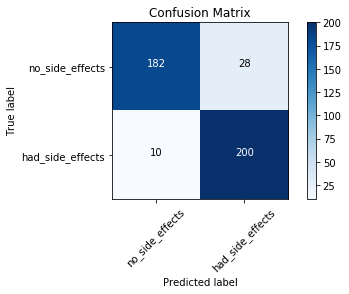

In [58]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In gist confusion matrix tells us about:

* **true positives (TP)**: These are cases in which we predicted yes (they have the side effect), and they do have the side effects. Here we predicted that 200 of them have side effect and they really do have side effect.

* **true negatives (TN)**: We predicted no they don't have any side effect, and they don't have the side effect. Here we predicted 182 have no side effect and they really do not have any side effect.

* **false positives (FP)**: We predicted yes, but they don't actually have the side effect. (Also known as a "**Type I error**"). Here we predicted 28 of them have side effect but they do not have any side effect.

* **false negatives (FN)**: We predicted no, but they actually do have the side effect. (Also known as a "**Type II error**"). Here we predicted 10 of them have no side effect but they do have some kind of side effect.

So based on confussion matrix we can have these rate values:

**Accuracy**: Overall, how often is the classifier correct?
(TP+TN)/total

In [59]:
(cm[0][0] + cm[1][1])/np.sum(cm)

0.90952380952380951

**Misclassification Rate**: Overall, how often is it wrong?
(FP+FN)/total

In [60]:
(cm[0][1] + cm[1][0])/np.sum(cm)

0.090476190476190474

This is equivalent to 1 minus Accuracy and also known as "Error Rate"

In [61]:
1 - (cm[0][0] + cm[1][1])/np.sum(cm)

0.090476190476190488

**True Positive Rate**: When it's actually yes, how often does it predict yes? TN/actual yes

In [62]:
cm[1][1] / (cm[1][0] + cm[1][1])

0.95238095238095233

also known as "**Sensitivity**" or "**Recall**"

**False Positive Rate**: When it's actually no, how often does it predict yes? FP/actual no

In [63]:
cm[0][0] / (cm[0][1] + cm[0][0])

0.8666666666666667

**Specificity**: When it's actually no, how often does it predict no? TN/actual no

equivalent to 1 minus False Positive Rate

**Precision**: When it predicts yes, how often is it correct? TP/predicted yes

**Prevalence**: How often does the yes condition actually occur in our sample? actual yes/total